In [435]:
#Import Dependencies
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [436]:
#Preprocessing utils
def correlation_plot(source):
    corr = source.corr(numeric_only = True)

    plt.figure(figsize = (20, 8))
    sns.heatmap(corr, cmap = "YlGnBu", annot = True)
    plt.show()

def split_dataset(source, target = "NObeyesdad"):
    data_dir = "/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/"
    
    
    X = source.drop(columns=[target])
    y = source[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size = 0.3,
        random_state = 42,
        stratify = y
    )

    X_train.to_csv(data_dir + "X_train.csv", index=False)
    X_test.to_csv(data_dir + "X_test.csv", index=False)
    y_train.to_csv(data_dir + "y_train.csv", index=False)
    y_test.to_csv(data_dir + "y_test.csv", index=False)

    print("Train set size:", X_train.shape)
    print("Test set size:", X_test.shape)
    
def outliers_plot(df):
    numeric_features = df.select_dtypes(include = ['int64', 'float64']).columns
    
    for col in numeric_features:
        plt.figure(figsize = (8, 4))
        sns.boxplot(x = df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

def outliers_summary(df):
    numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns

    print("Outlier Summary per Numeric Feature:\n")
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        count = outliers.shape[0]

        print(f"{col}: {count} outlier(s)")
        if count > 0:
            print("Values:", outliers.values)
        print("-" * 50)

def scale_minmax(X_train, X_test, features):
    scaler = MinMaxScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    scaler.fit(X_train[features])

    X_train_scaled[features] = scaler.transform(X_train[features])
    X_test_scaled[features] = scaler.transform(X_test[features])

    return X_train_scaled, X_test_scaled

def scale_standard(X_train, X_test, features):
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    scaler.fit(X_train[features])
    X_train_scaled[features] = scaler.transform(X_train[features])
    X_test_scaled[features] = scaler.transform(X_test[features])
    
    return X_train_scaled, X_test_scaled

def scale_robust(X_train, X_test, features):
    scaler = RobustScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    scaler.fit(X_train[features])
    X_train_scaled[features] = scaler.transform(X_train[features])
    X_test_scaled[features] = scaler.transform(X_test[features])
    
    return X_train_scaled, X_test_scaled

In [437]:
#Classical model utils

def knn_predict():
    boss_knn = None
    boss_y = None
    boss_k = None
    max_accuracy = float("-inf")

    for k in range(1, 31):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > max_accuracy:
            boss_y = y_pred
            max_accuracy = accuracy
            boss_k = k
            boss_knn = knn

    print("Best value of K is", boss_k)
    return boss_knn, boss_y, max_accuracy

def nb_predict():
    nb = GaussianNB()

    nb.fit(X_train_scaled, y_train)
    y_pred = nb.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return nb, y_pred, accuracy

def dt_predict():
    dt = DecisionTreeClassifier(
    criterion = "entropy", 
    max_depth = None,
    random_state = 42
)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return dt, y_pred, accuracy

'''def sigmoid(z):
    return 1 / (1 + np.exp(-z))


class Logistic_Regression_GD:
    def __init__(self, lr = 0.01, epochs = 1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n) #w
        self.b = 0           #beta
        self.losses = []

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.w) + self.b
            y_pred = sigmoid(linear_model)

            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

            loss = -(1 / m) * np.sum(y * np.log(y_pred + 1e-10) + (1-y) * np.log(1 - y_pred + 1e-10))
            self.losses.append(loss)

    def predict(self, X):
        linear_model = np.dot(X, self.w) + self.b
        y_pred = sigmoid(linear_model)
        return np.where(y_pred >= 0.5, 1, 0)

def log_predict():
    log_reg = Logistic_Regression_GD()

    log_reg.fit(X_train_scaled, y_train)
    y_pred = log_reg.predict(X_test_scaled)
    accuracy = accuracy_score(y_pred, y_test)
    return y_pred, accuracy'''


def log_predict():
    log_reg = LogisticRegression(
        solver = 'lbfgs',
        max_iter = 1000,    
        random_state = 42
    )

    log_reg.fit(X_train_scaled, y_train)
    y_pred = log_reg.predict(X_test_scaled)
    accuracy = accuracy_score(y_pred, y_test)
    return log_reg, y_pred, accuracy

# **Dataset Description**

In [438]:
source = pd.read_csv('/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/Updated_Obesity_Dataset.csv')
target_col = source.columns[-1]

In [439]:
#1 Number of features
num_features = source.shape[1] - 1
print(f"Number of features: {num_features}") 

Number of features: 16


In [440]:
# 2. Classification or regression problem?
if source[target_col].dtype == "object":
    problem_type = "Classification"
else:
    problem_type = "Regression"
print(f"Problem type: {problem_type}")

Problem type: Classification


In [441]:
# 3. How many data points?
num_data_points = source.shape[0]
print(f"Number of data points: {num_data_points}")

Number of data points: 2111


In [442]:
# 4. Type of features (Quantitative / Categorical)
feature_types = source.dtypes[:-1].apply(lambda x: "Categorical" if x == "object" else "Quantitative")
print("Feature types:\n", feature_types)

Feature types:
 Age                               Quantitative
Gender                             Categorical
Height                            Quantitative
Weight                            Quantitative
CALC                               Categorical
FAVC                               Categorical
FCVC                              Quantitative
NCP                               Quantitative
SCC                                Categorical
SMOKE                              Categorical
CH2O                              Quantitative
family_history_with_overweight     Categorical
FAF                               Quantitative
TUE                               Quantitative
CAEC                               Categorical
MTRANS                             Categorical
dtype: object


In [443]:
# 5. Do you need to encode categorical variables?
needs_encoding = any(feature_types == "Categorical")
print(f"Need to encode categorical variables?: {'Yes' if needs_encoding else 'No'}")

Need to encode categorical variables?: Yes


In [444]:
#Corelation in preprocessing.ipynb after encoding properly (or below under preprocessing markdown)

***Imbalanced Dataset***

Class distribution:
 NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64
-------------------------------------------------------------------------------------
The dataset is imbalanced: classes have different number of instances.
-------------------------------------------------------------------------------------


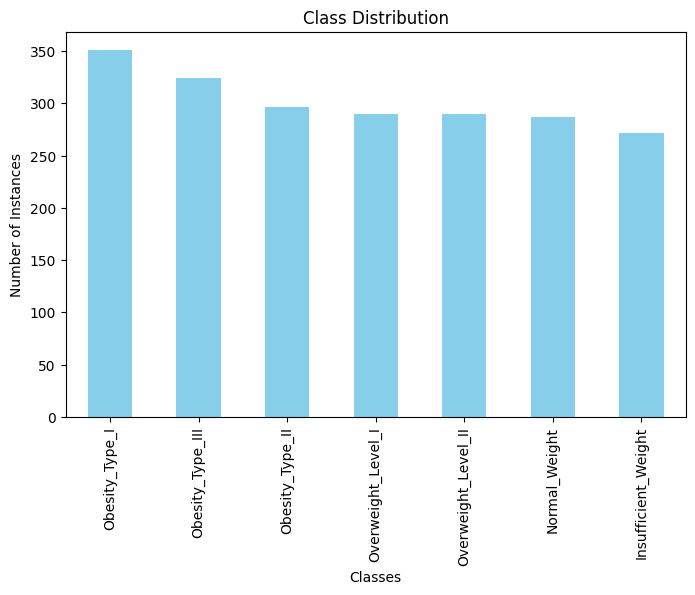

In [445]:
# Are all classes equally represented?
class_counts = source[target_col].value_counts()
print("Class distribution:\n", class_counts)

print('-' * 85)
if class_counts.nunique() == 1:
    print("The dataset is balanced: all classes have equal number of instances.")
else:
    print("The dataset is imbalanced: classes have different number of instances.")
print('-' * 85)

plt.figure(figsize = (8, 5))
class_counts.plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()

Has to be stratified due to imbalance ^

***EDA***

In [446]:
print("Dataset Shape:", source.shape)
print("Feature Types:\n", source.dtypes)
print("Missing Values:\n", source.isnull().sum())
print("Unique Values in Categorical Features:")
for col in source.select_dtypes(include = 'object').columns:
    print(f"{col}: {source[col].nunique()} unique values")

Dataset Shape: (2111, 17)
Feature Types:
 Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object
Missing Values:
 Age                                0
Gender                            11
Height                             0
Weight                             0
CALC                               0
FAVC                        

In [447]:
categorical_cols = source.select_dtypes(include='object').columns.drop(target_col)
categorical_features = source.select_dtypes(include = "object")
numeric_cols = source.select_dtypes(include = ['int64', 'float64']).columns
numerical_data = source.select_dtypes(include = ['int64', 'float64'])

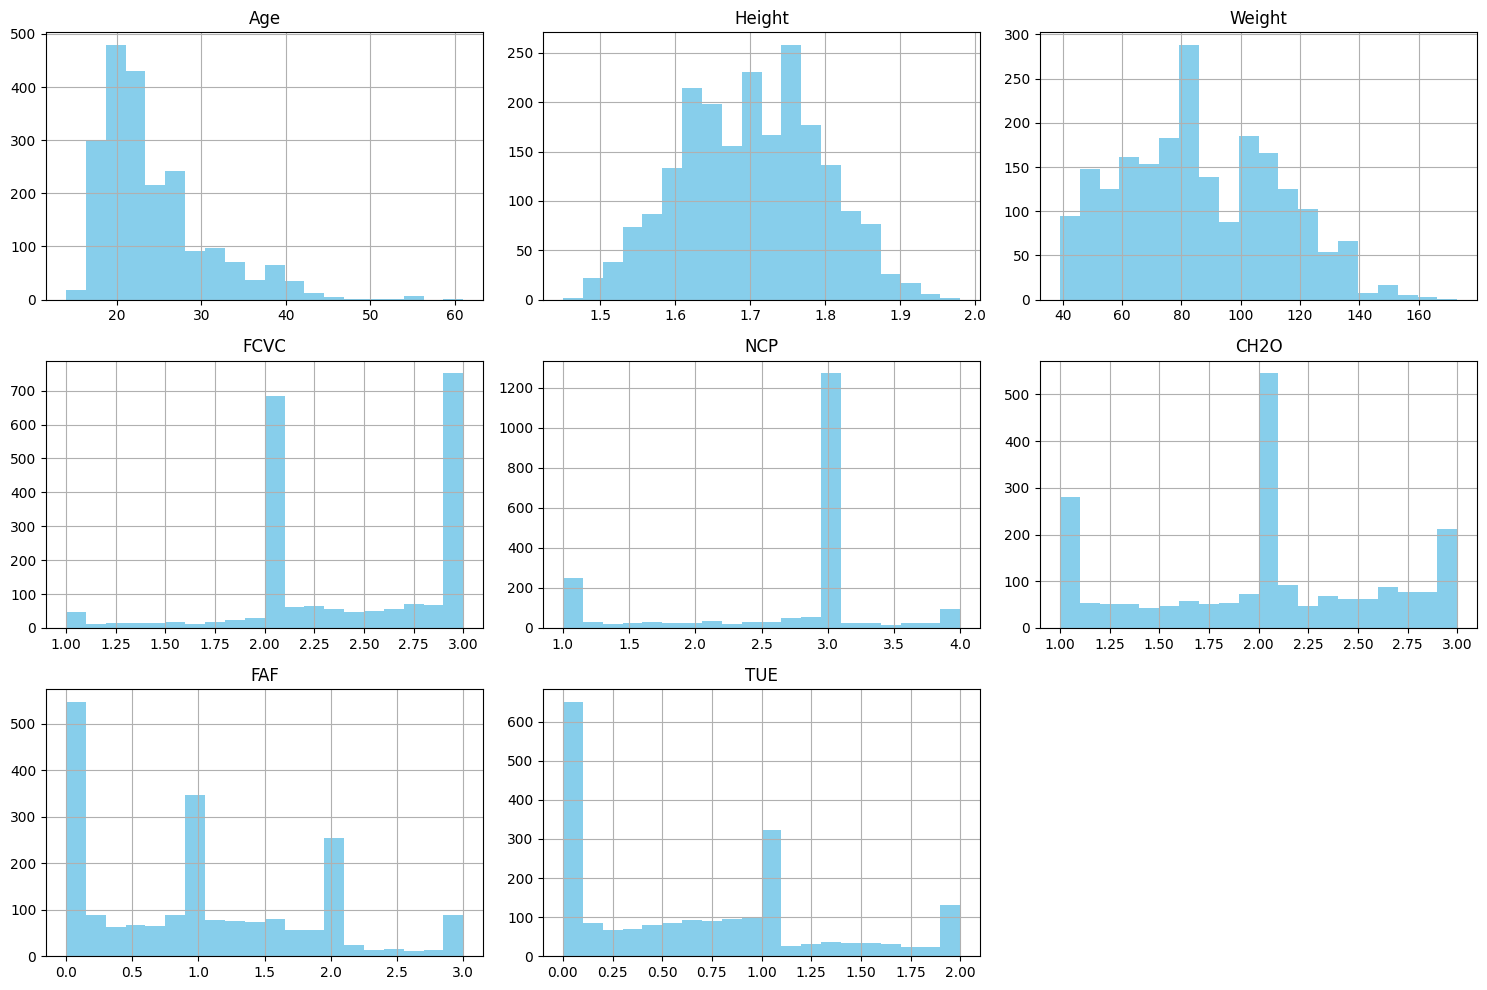

In [448]:
source[numeric_cols].hist(figsize = (15,10), bins = 20, color = 'skyblue')
plt.tight_layout()
plt.show()

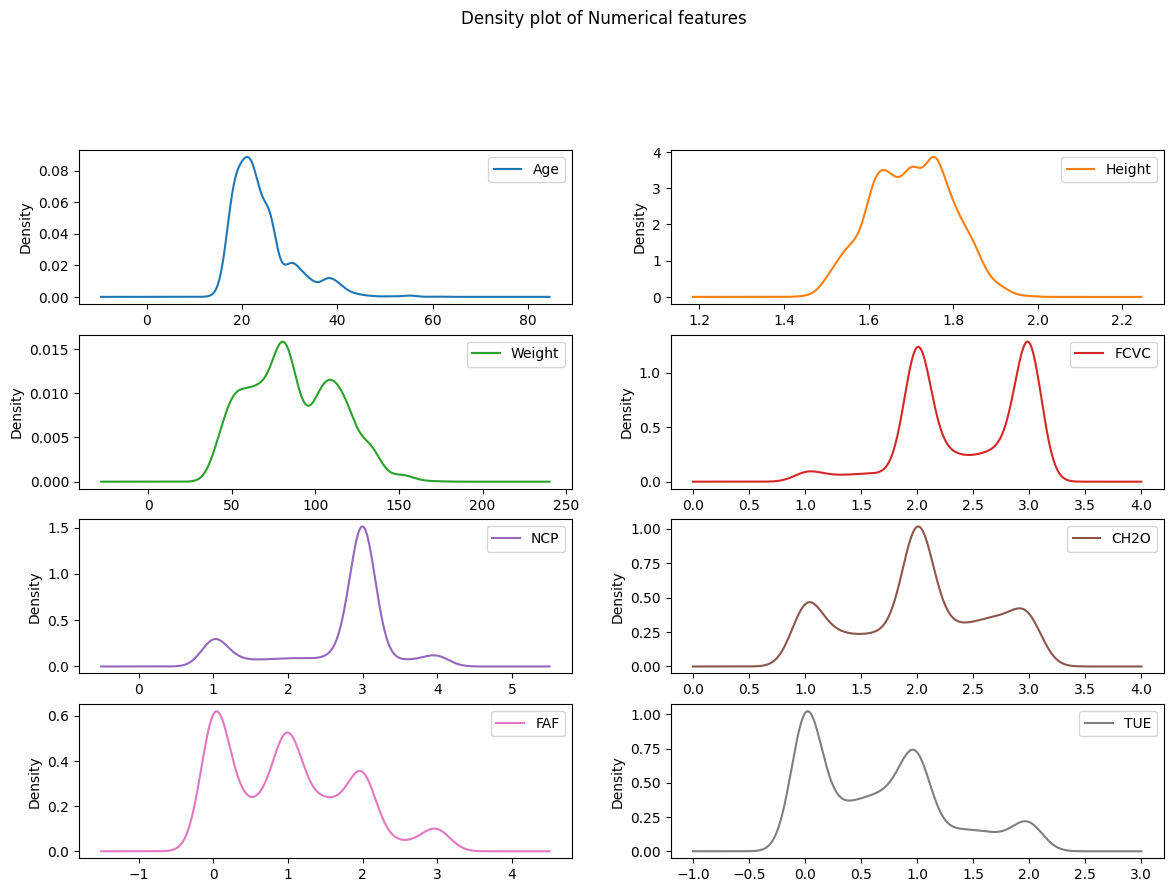

In [449]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

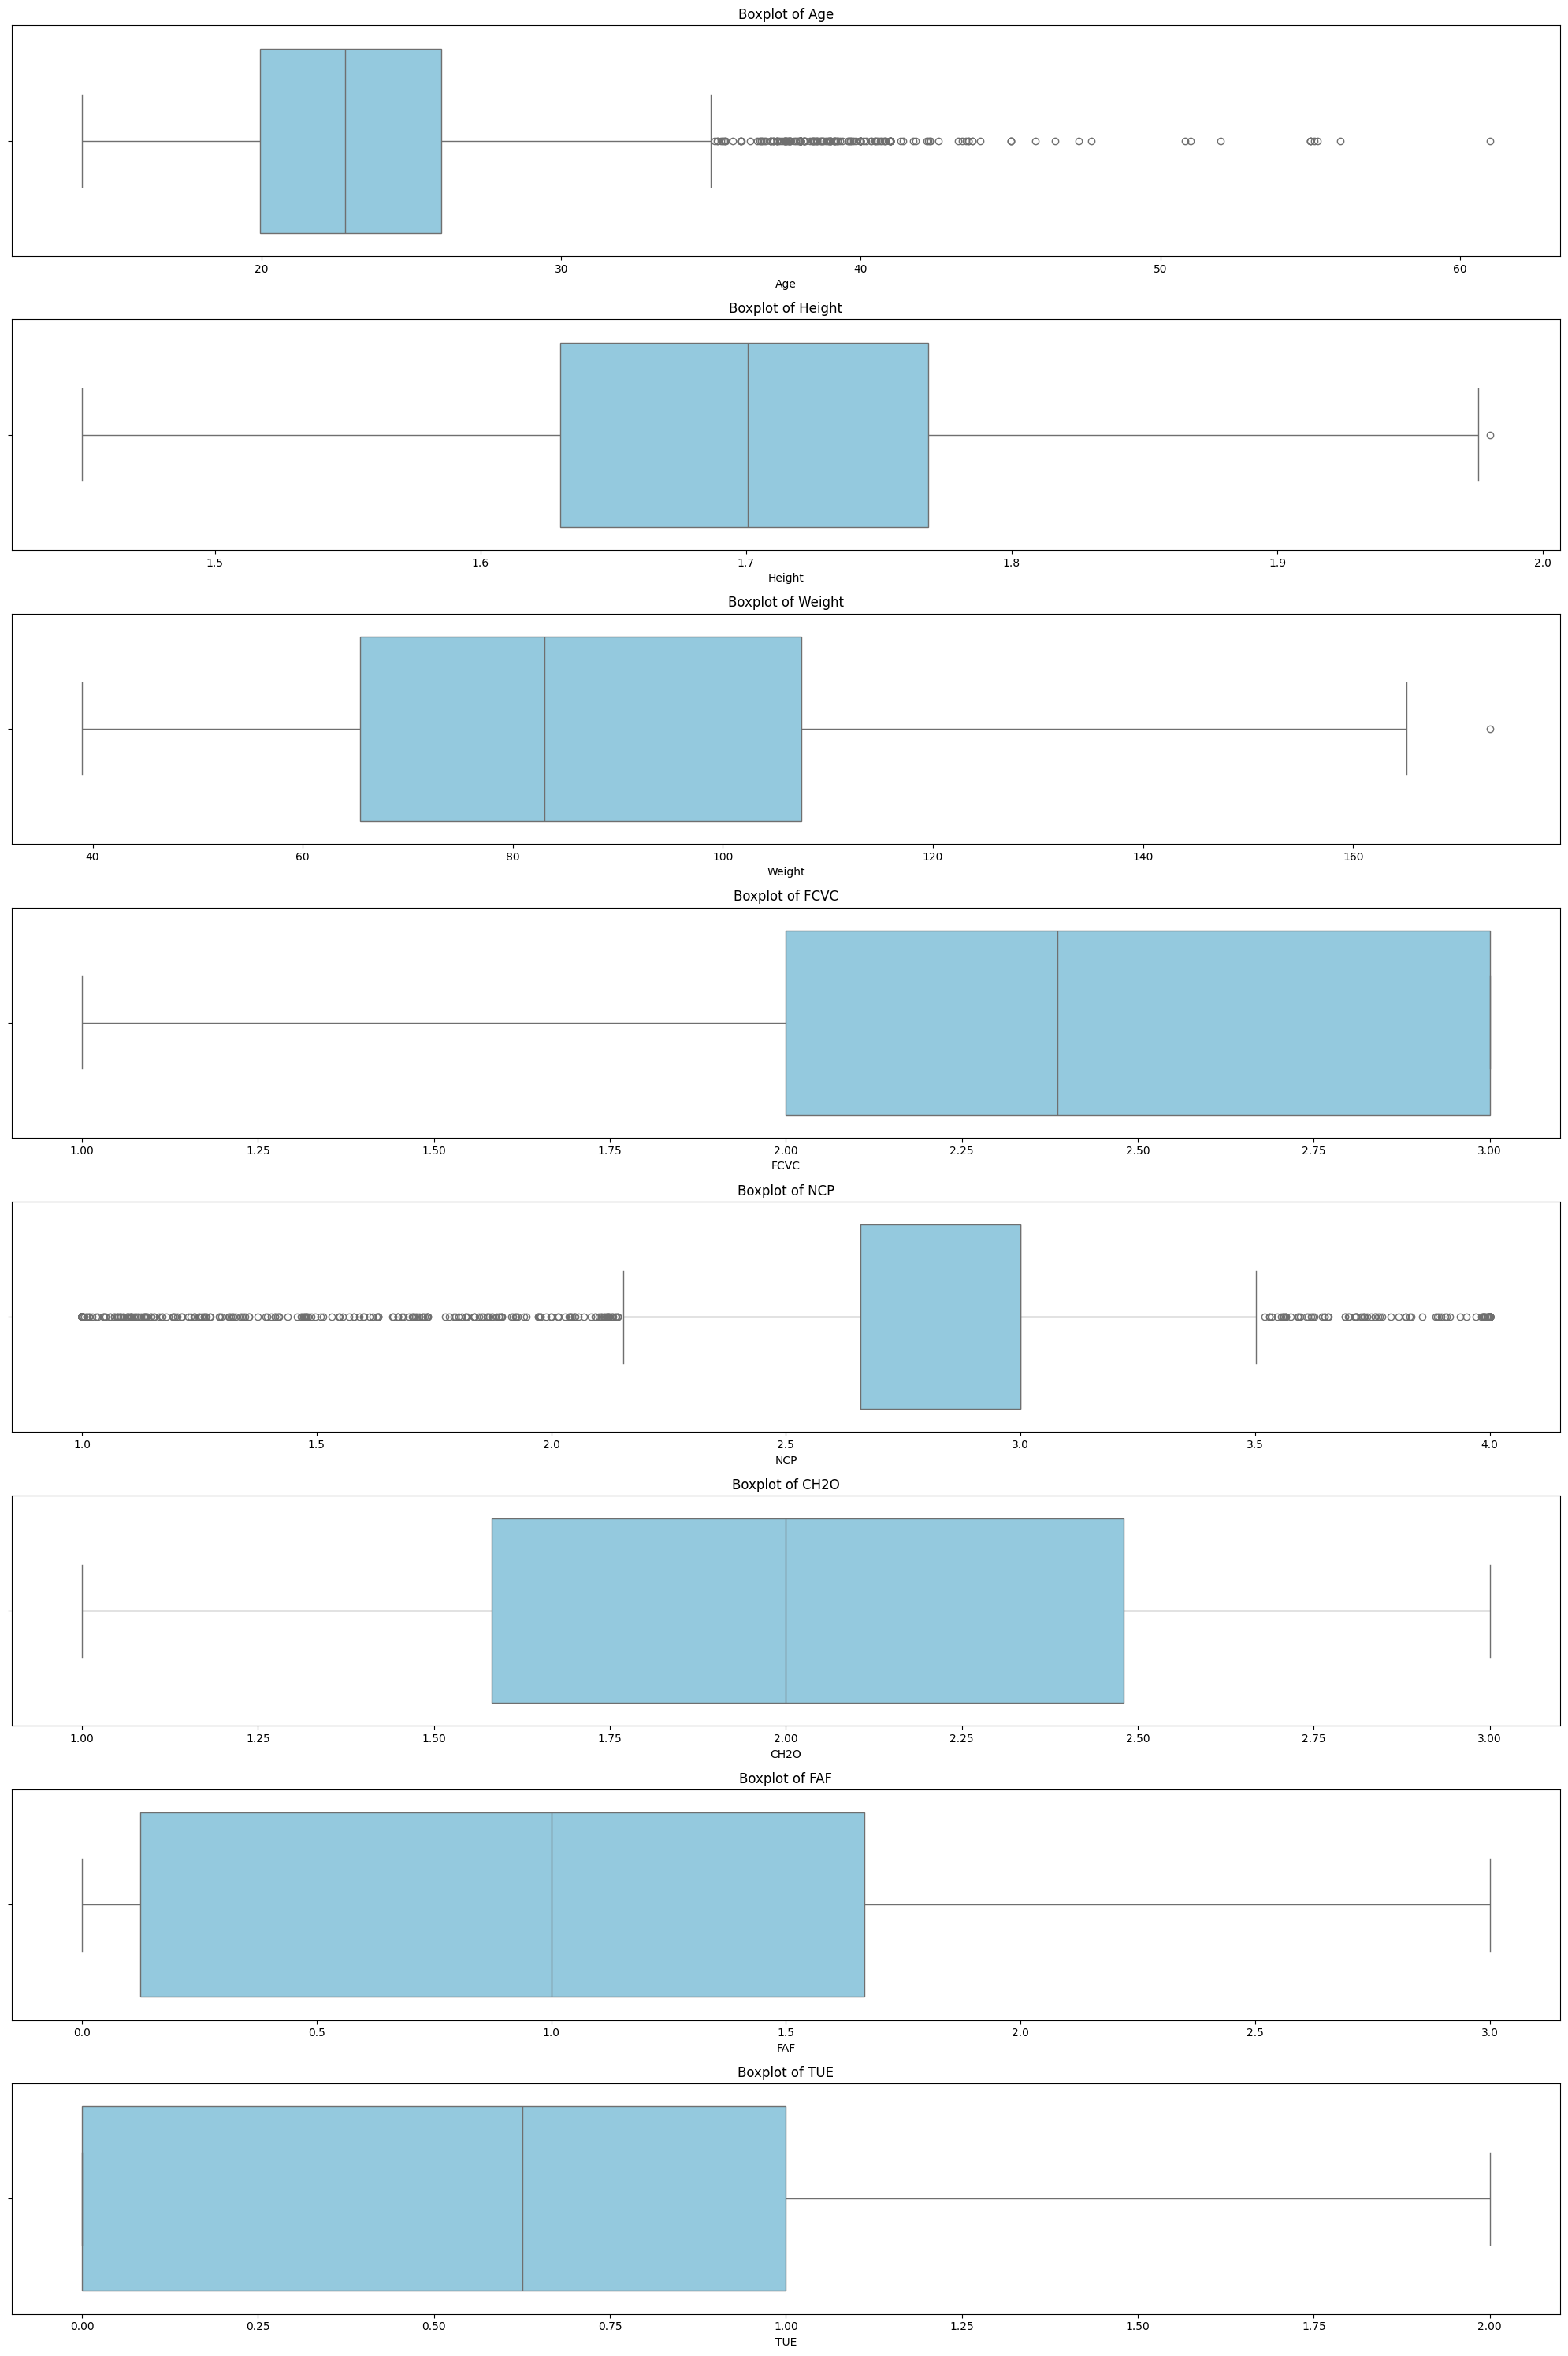

In [450]:
plt.figure(figsize = (20, 30))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x = source[col], color = 'skyblue')
    plt.title(f'Boxplot of {col}', fontsize = 12)
    plt.tight_layout()

plt.show()
#A lot of outliers in some

In [ ]:
sns.pairplot(source, hue = target_col, vars = numeric_cols)
plt.show()

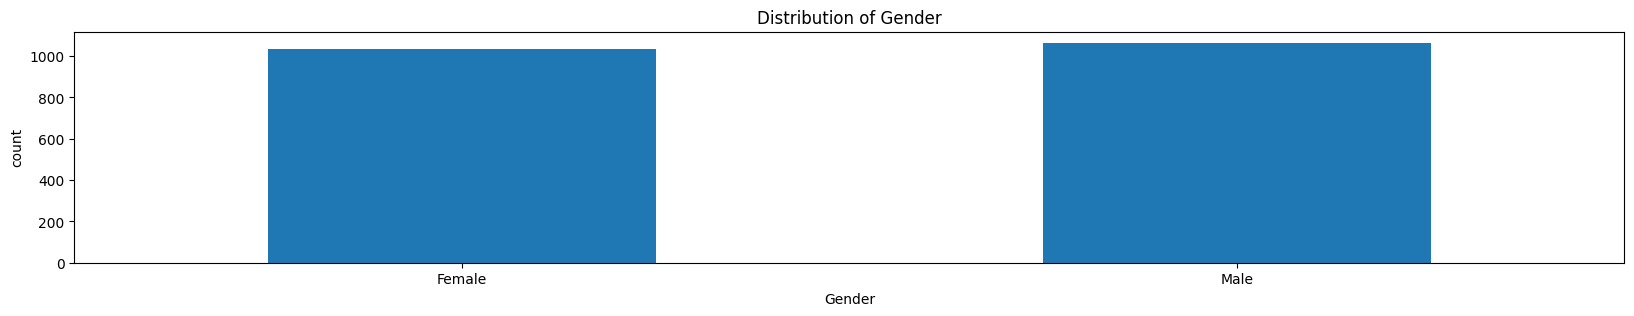

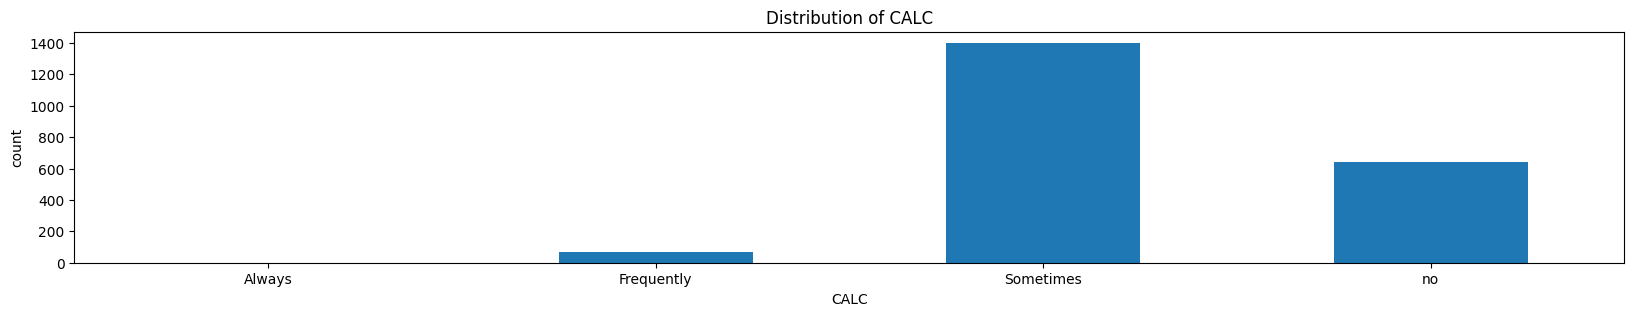

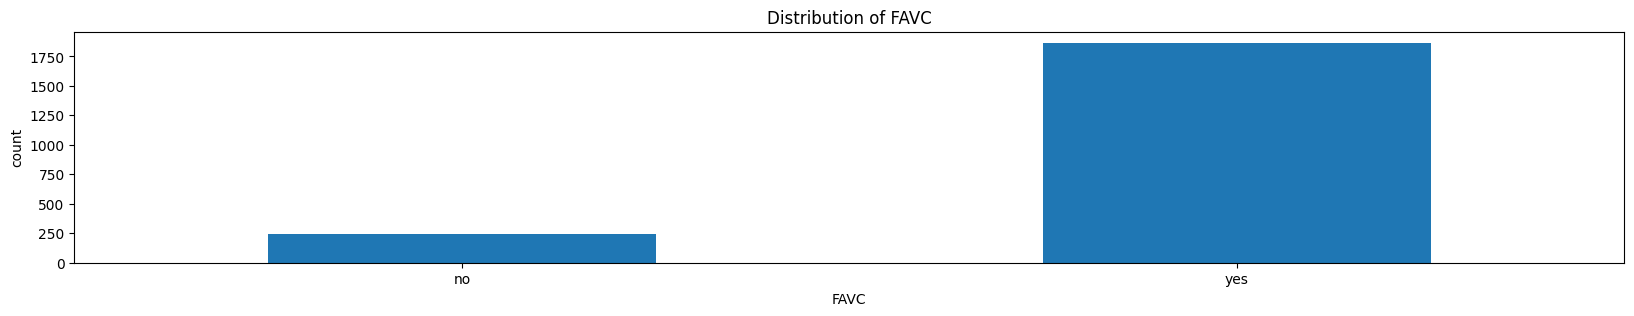

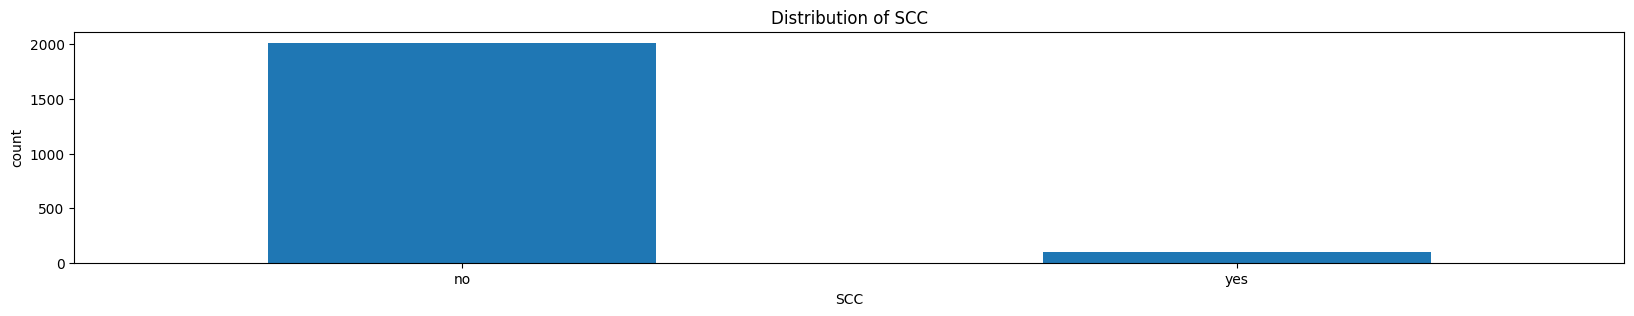

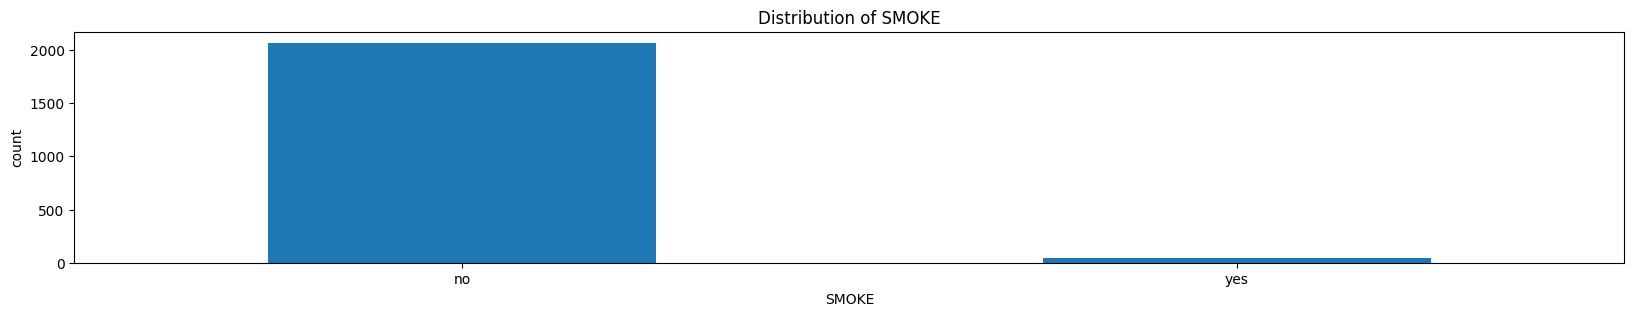

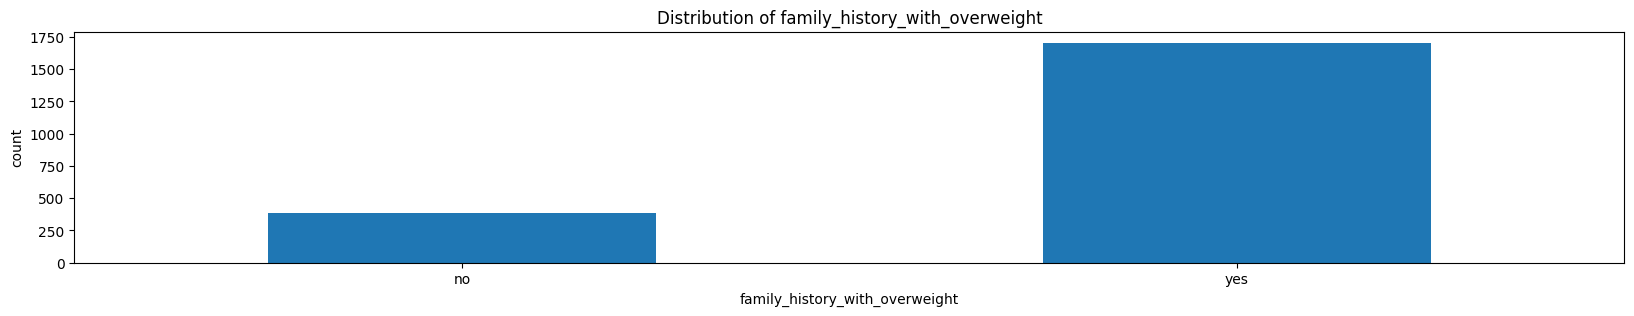

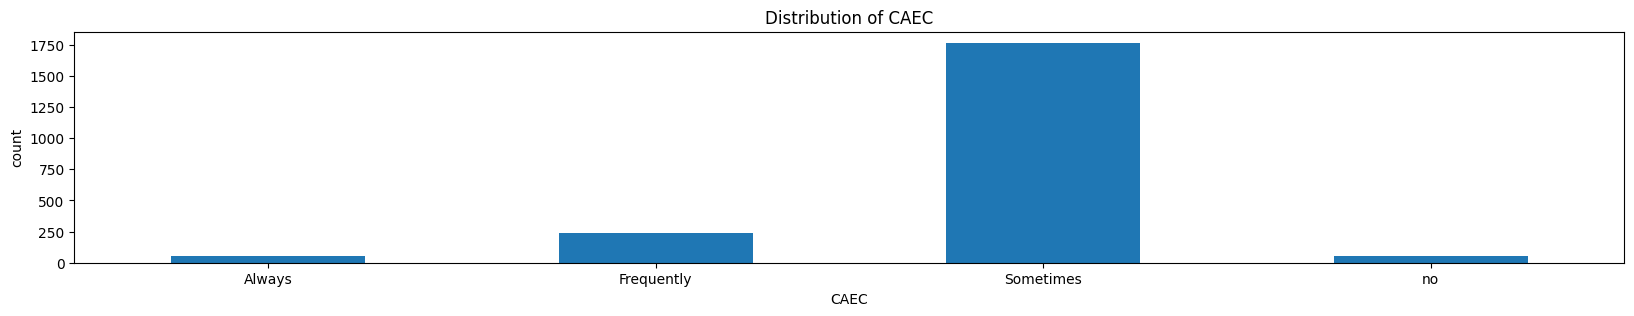

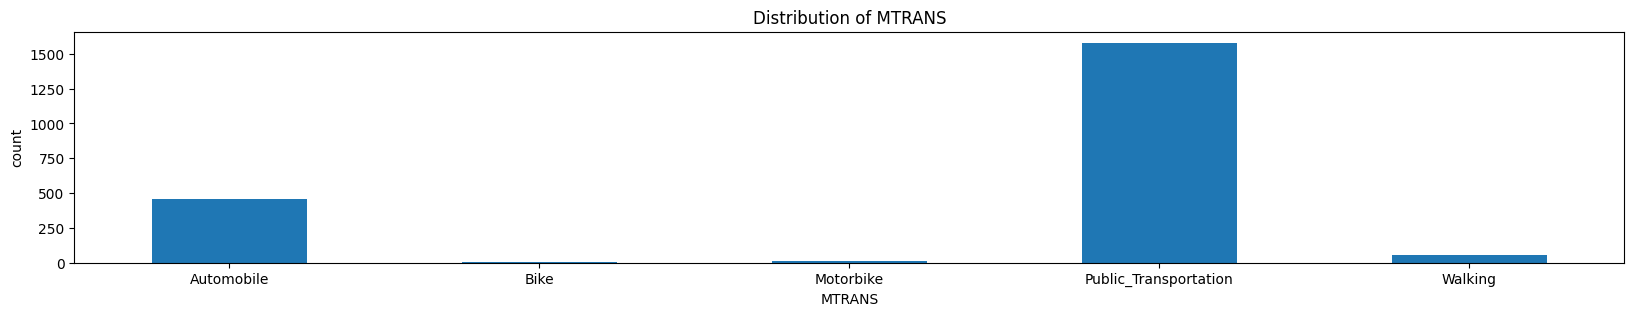

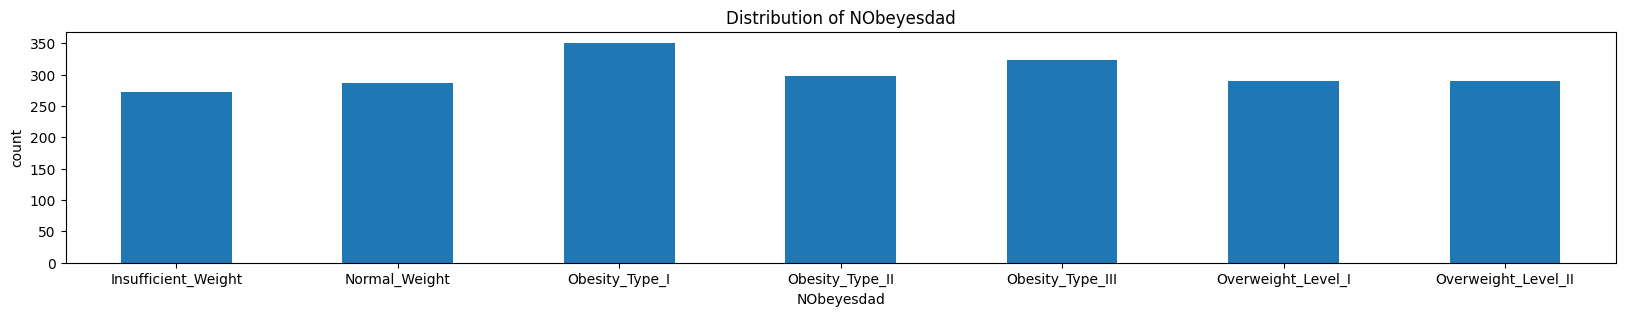

In [ ]:
for col in categorical_features:

    plt.figure(figsize = (20, 3))
    source[col].value_counts().sort_index().plot(kind = 'bar', rot = 0, xlabel = col, ylabel='count')
    plt.title(f'Distribution of {col}')
    plt.show()

# **Preprocessing**

***Categorical features handling as found from the above section***

In [ ]:

source["Gender"] = source["Gender"].map({"Male" : 0, "Female" : 1})
source["CALC"] = source["CALC"].map({"no" : 0, "Always" : 1, "Sometimes": 0.25, "Frequently": 0.75})
source["FAVC"] = source["FAVC"].map({"no" : 0, "yes" : 1})
source["SCC"] = source["SCC"].map({"no" : 0, "yes" : 1})
source["SMOKE"] = source["SMOKE"].map({"no" : 0, "yes" : 1})
source["family_history_with_overweight"] = source["family_history_with_overweight"].map({"yes": 1, "no": 0})
source["CAEC"] = source["CAEC"].map({"no" : 0, "Always" : 1, "Sometimes": 0.25, "Frequently": 0.75})
source["NObeyesdad"] = source["NObeyesdad"].map({"Normal_Weight" : 1, "Insufficient_Weight": 0, 
                                                 "Overweight_Level_I" : 2, "Overweight_Level_II": 3,
                                                 "Obesity_Type_I": 4, "Obesity_Type_II": 5,
                                                 "Obesity_Type_III": 6})
source.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,1.0,1.62,64.0,0.00,0,2.0,3.0,0,0,2.0,1.0,0.0,1.0,0.25,Public_Transportation,1
1,21.0,1.0,1.52,56.0,0.25,0,3.0,3.0,1,1,3.0,1.0,3.0,0.0,0.25,Public_Transportation,1
2,23.0,0.0,1.80,77.0,0.75,0,2.0,3.0,0,0,2.0,1.0,2.0,1.0,0.25,Public_Transportation,1
3,27.0,0.0,1.80,87.0,0.75,0,3.0,3.0,0,0,2.0,0.0,2.0,0.0,0.25,Walking,2
4,22.0,0.0,1.78,89.8,0.25,0,2.0,1.0,0,0,2.0,0.0,0.0,0.0,0.25,Public_Transportation,3


In [ ]:
category_enc = pd.get_dummies(source['MTRANS'])
category_enc.head()
source = pd.concat([source.drop('MTRANS', axis=1), category_enc], axis=1)
features = ["Automobile", "Bike", "Motorbike", "Public_Transportation", "Walking"]
for feature in features:
    source[feature] = source[feature].map({False: 0, True: 1})

source

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,21.000000,1.0,1.620000,64.000000,0.00,0,2.0,3.0,0,0,...,1.0,0.000000,1.000000,0.25,1,0,0,0,1,0
1,21.000000,1.0,1.520000,56.000000,0.25,0,3.0,3.0,1,1,...,1.0,3.000000,0.000000,0.25,1,0,0,0,1,0
2,23.000000,0.0,1.800000,77.000000,0.75,0,2.0,3.0,0,0,...,1.0,2.000000,1.000000,0.25,1,0,0,0,1,0
3,27.000000,0.0,1.800000,87.000000,0.75,0,3.0,3.0,0,0,...,0.0,2.000000,0.000000,0.25,2,0,0,0,0,1
4,22.000000,0.0,1.780000,89.800000,0.25,0,2.0,1.0,0,0,...,0.0,0.000000,0.000000,0.25,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.0,1.710730,131.408528,0.25,1,3.0,3.0,0,0,...,1.0,1.676269,0.906247,0.25,6,0,0,0,1,0
2107,21.982942,1.0,1.748584,133.742943,0.25,1,3.0,3.0,0,0,...,1.0,1.341390,0.599270,0.25,6,0,0,0,1,0
2108,22.524036,1.0,1.752206,133.689352,0.25,1,3.0,3.0,0,0,...,1.0,1.414209,0.646288,0.25,6,0,0,0,1,0
2109,24.361936,1.0,1.739450,133.346641,0.25,1,3.0,3.0,0,0,...,1.0,1.139107,0.586035,0.25,6,0,0,0,1,0


***NULL Handling***

In [ ]:
source.head(4)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,21.0,1.0,1.62,64.0,0.00,0,2.0,3.0,0,0,...,1.0,0.0,1.0,0.25,1,0,0,0,1,0
1,21.0,1.0,1.52,56.0,0.25,0,3.0,3.0,1,1,...,1.0,3.0,0.0,0.25,1,0,0,0,1,0
2,23.0,0.0,1.80,77.0,0.75,0,2.0,3.0,0,0,...,1.0,2.0,1.0,0.25,1,0,0,0,1,0
3,27.0,0.0,1.80,87.0,0.75,0,3.0,3.0,0,0,...,0.0,2.0,0.0,0.25,2,0,0,0,0,1


In [ ]:
print(source.shape)
print(source.isnull().sum())

(2111, 21)
Age                                0
Gender                            11
Height                             0
Weight                             0
CALC                               0
FAVC                               0
FCVC                               0
NCP                                0
SCC                                0
SMOKE                              0
CH2O                              21
family_history_with_overweight    21
FAF                                0
TUE                                0
CAEC                               0
NObeyesdad                         0
Automobile                         0
Bike                               0
Motorbike                          0
Public_Transportation              0
Walking                            0
dtype: int64


In [ ]:
row_nulls = source.isnull().sum(axis = 1)
rows_with_nulls = row_nulls[row_nulls > 0]
for idx, count in rows_with_nulls.items():
    print(f"Row {idx} → {count} null(s)")

Row 48 → 1 null(s)
Row 70 → 1 null(s)
Row 71 → 1 null(s)
Row 125 → 1 null(s)
Row 143 → 1 null(s)
Row 157 → 1 null(s)
Row 196 → 1 null(s)
Row 205 → 1 null(s)
Row 263 → 1 null(s)
Row 274 → 1 null(s)
Row 281 → 1 null(s)
Row 284 → 1 null(s)
Row 314 → 1 null(s)
Row 324 → 1 null(s)
Row 330 → 1 null(s)
Row 420 → 1 null(s)
Row 463 → 1 null(s)
Row 501 → 1 null(s)
Row 527 → 1 null(s)
Row 544 → 1 null(s)
Row 603 → 1 null(s)
Row 634 → 1 null(s)
Row 722 → 1 null(s)
Row 730 → 1 null(s)
Row 744 → 1 null(s)
Row 792 → 1 null(s)
Row 932 → 1 null(s)
Row 965 → 1 null(s)
Row 995 → 1 null(s)
Row 1040 → 1 null(s)
Row 1178 → 1 null(s)
Row 1241 → 1 null(s)
Row 1257 → 1 null(s)
Row 1411 → 1 null(s)
Row 1442 → 1 null(s)
Row 1444 → 1 null(s)
Row 1449 → 1 null(s)
Row 1450 → 1 null(s)
Row 1454 → 1 null(s)
Row 1483 → 1 null(s)
Row 1561 → 1 null(s)
Row 1563 → 1 null(s)
Row 1582 → 1 null(s)
Row 1635 → 1 null(s)
Row 1656 → 1 null(s)
Row 1673 → 1 null(s)
Row 1812 → 1 null(s)
Row 1831 → 1 null(s)
Row 1916 → 1 null(s)
Row

No row/column had to be dropped ^

***NULL Transform***

In [ ]:
print(source.isnull().sum())

Age                                0
Gender                            11
Height                             0
Weight                             0
CALC                               0
FAVC                               0
FCVC                               0
NCP                                0
SCC                                0
SMOKE                              0
CH2O                              21
family_history_with_overweight    21
FAF                                0
TUE                                0
CAEC                               0
NObeyesdad                         0
Automobile                         0
Bike                               0
Motorbike                          0
Public_Transportation              0
Walking                            0
dtype: int64


In [ ]:
median_imputer = SimpleImputer(strategy = "median")
mode_imputer = SimpleImputer(strategy = "most_frequent")

source[["CH2O"]] = median_imputer.fit_transform(source[["CH2O"]])
source[["Gender", "family_history_with_overweight"]] = mode_imputer.fit_transform(source[["Gender", "family_history_with_overweight"]])

In [ ]:
print(source.isnull().sum())

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
NObeyesdad                        0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
dtype: int64


Took Median value for NULL values in CH2O column and Mode value for NULL values in Gender and family_history_with_overweight colms ^

No Column has to be dropped as all the columns are relevant to the target

***Finding feature - feature correlation using heatmap (to be used in question 6 of dataset description)***

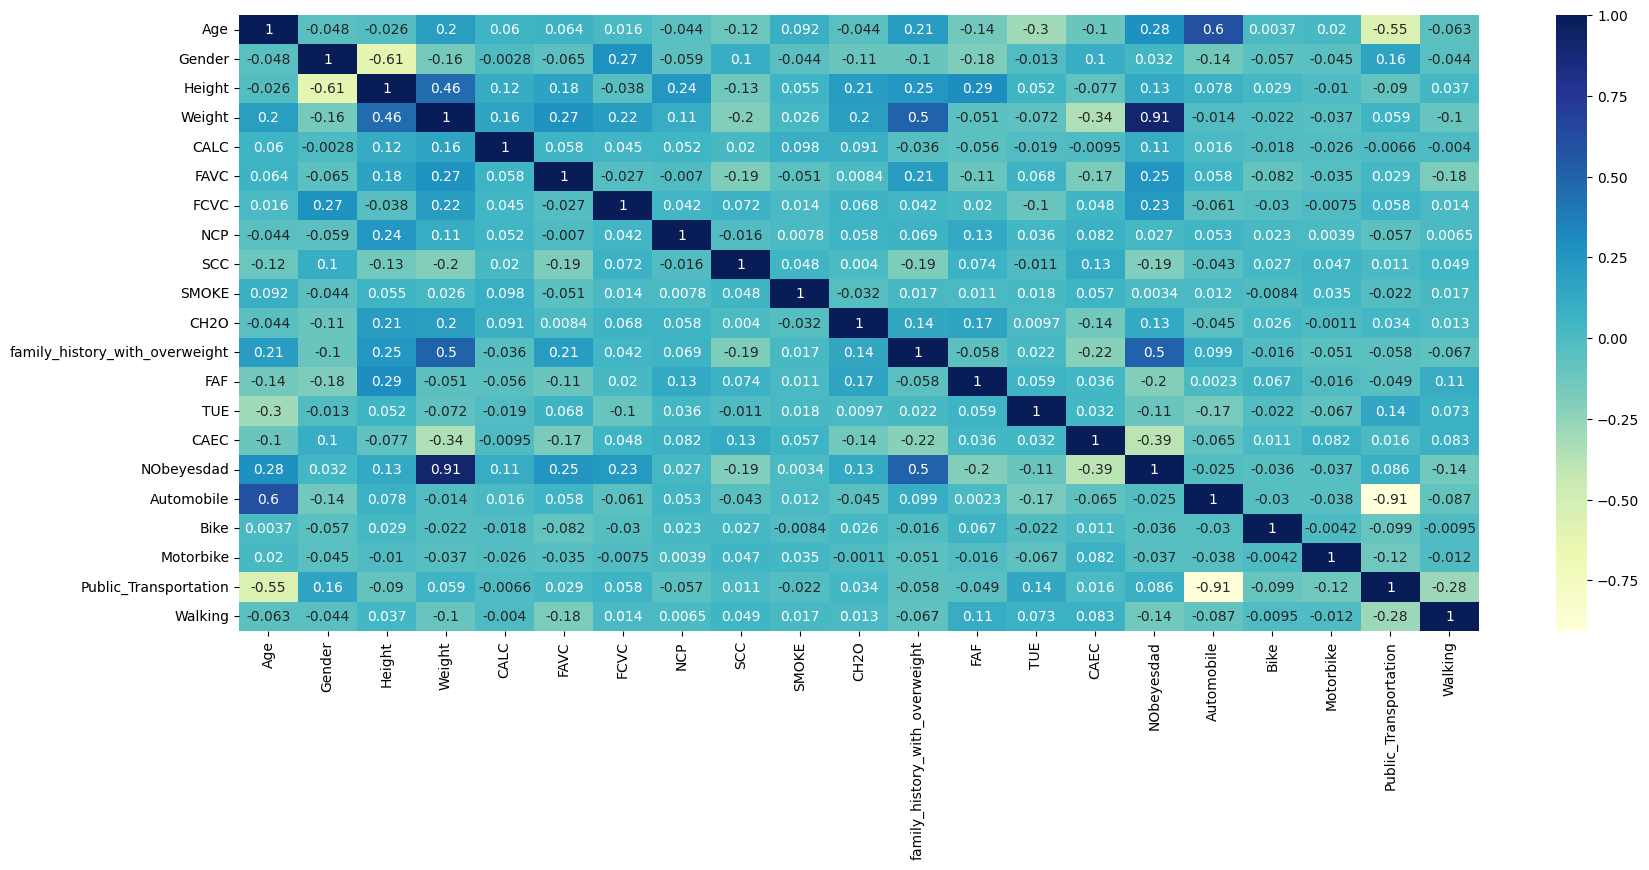

In [ ]:
correlation_plot(source)

No notable feature - feature correlation ^

***Export for Split before Normalization***

In [ ]:
source.to_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/processed_dataset.csv", index = False)
source = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/processed_dataset.csv")
split_dataset(source)

Train set size: (1477, 20)
Test set size: (634, 20)


# **Normalization**

In [ ]:
X_train = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_train.csv")
X_test = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_test.csv")
y_train = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/y_train.csv")
y_test = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/y_test.csv")

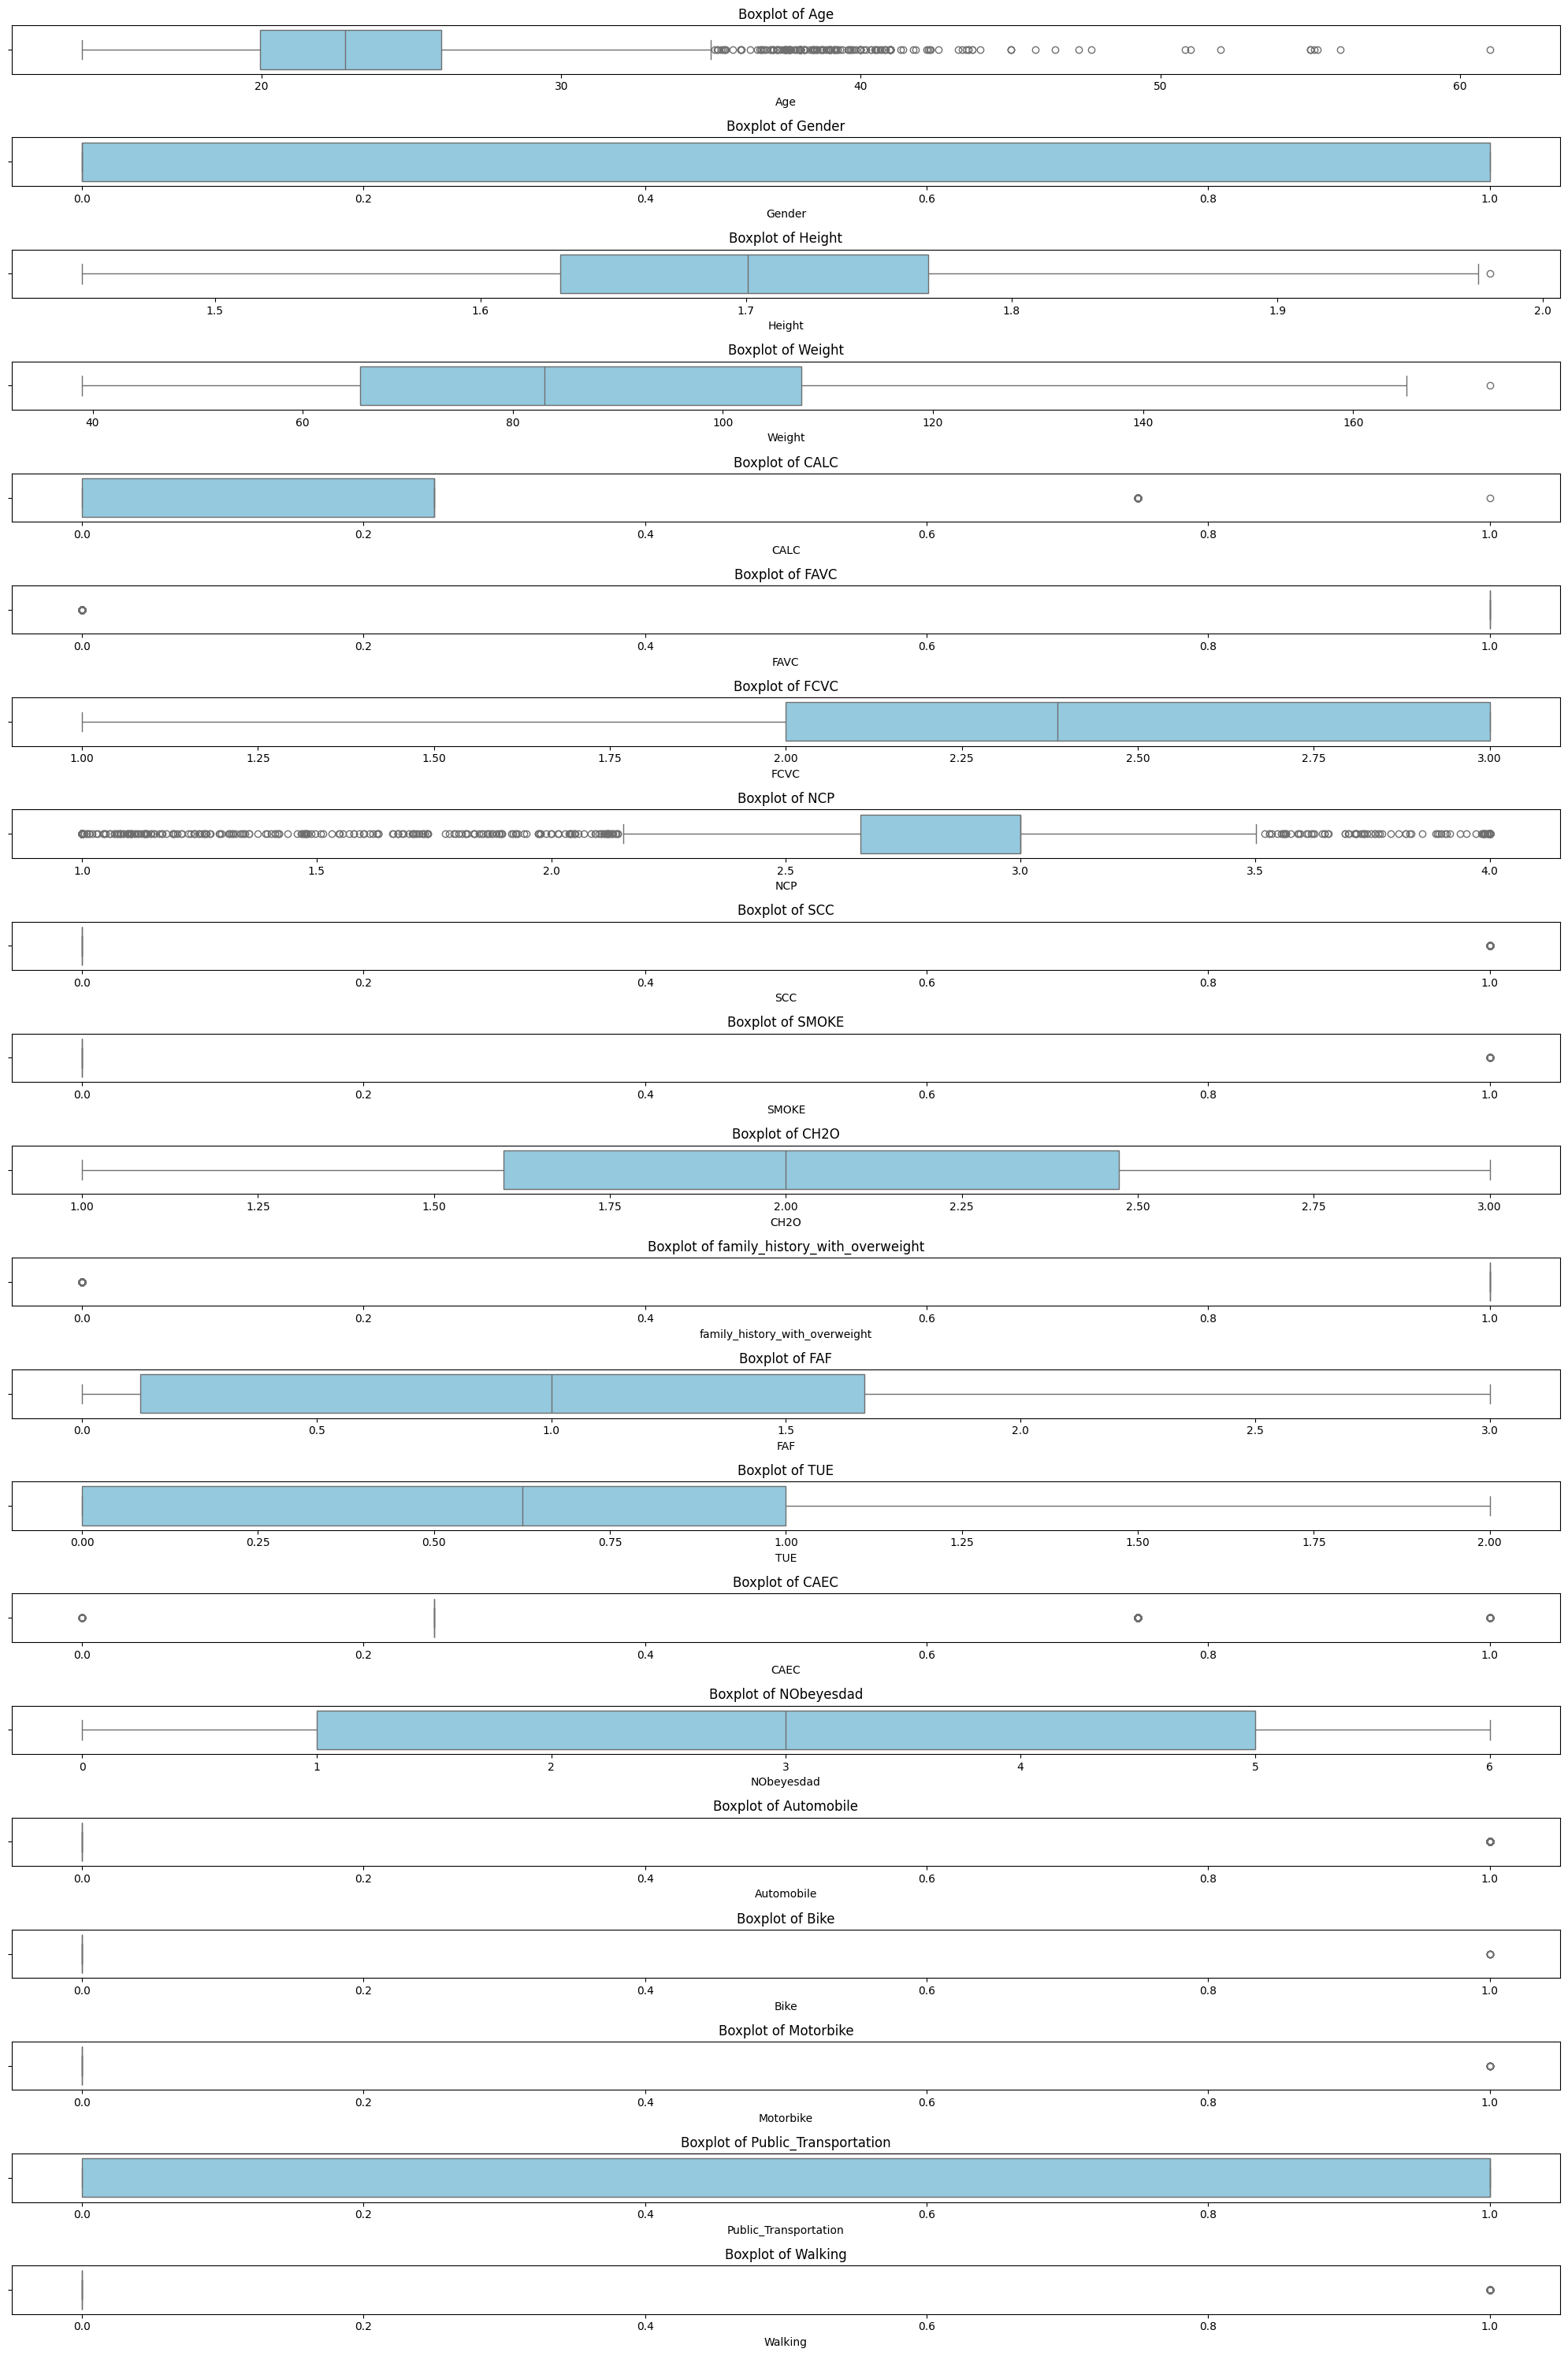

In [ ]:
numeric_cols = source.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize = (20, 30))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x = source[col], color = 'skyblue')
    plt.title(f'Boxplot of {col}', fontsize = 12)
    plt.tight_layout()

plt.show()

In [ ]:
# Applying Normalization techniques based on the outliers
scaler_mapping = {
    'Age': 'RobustScaler',
    'NCP': 'RobustScaler',
    'Height': 'StandardScaler',
    'Weight': 'StandardScaler',
    'CALC': 'RobustScaler',
    'FCVC': 'StandardScaler',
    'CH2O': 'StandardScaler',
    'FAF': 'StandardScaler',
    'TUE': 'StandardScaler',
    'CAEC': 'RobustScaler',
}

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for feature, scaler_type in scaler_mapping.items():
    if scaler_type == 'MinMaxScaler':
        X_train_scaled, X_test_scaled = scale_minmax(X_train_scaled, X_test_scaled, [feature])
    elif scaler_type == 'StandardScaler':
        X_train_scaled, X_test_scaled = scale_standard(X_train_scaled, X_test_scaled, [feature])
    elif scaler_type == 'RobustScaler':
        X_train_scaled, X_test_scaled = scale_robust(X_train_scaled, X_test_scaled, [feature])

X_scaled_combined = pd.concat([X_train_scaled, X_test_scaled], axis = 0).reset_index(drop = True)
y_combined = pd.concat([y_train, y_test], axis = 0).reset_index(drop = True)

preprocessed_dataset_scaled = X_scaled_combined.copy()
preprocessed_dataset_scaled['target'] = y_combined 
preprocessed_dataset_scaled

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight,FAF,TUE,CAEC,Automobile,Bike,Motorbike,Public_Transportation,Walking,target
0,0.187931,0.0,-0.923914,0.539578,-1.0,1,0.872726,-3.466577,0,0,...,1.0,0.087554,0.681499,0.00,0,0,0,1,0,5
1,-0.222125,1.0,1.112428,2.871914,0.0,1,1.098762,0.000000,0,0,...,1.0,-0.677285,-0.006556,0.00,0,0,0,1,0,6
2,2.775739,0.0,0.965450,0.453708,0.0,1,-0.710481,-2.113806,0,0,...,1.0,0.303139,0.042355,0.00,1,0,0,0,0,4
3,1.012959,0.0,2.244734,1.683830,0.0,1,-0.402662,0.000000,0,0,...,1.0,0.130509,-1.059578,0.00,0,0,0,1,0,5
4,-0.308298,0.0,-0.860279,-0.628454,0.0,1,-0.792484,-5.346764,0,0,...,0.0,-0.002895,-1.059578,-0.25,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.518231,1.0,-0.736263,0.977641,0.0,1,1.098762,0.000000,0,0,...,1.0,-1.181703,-0.643837,0.00,0,0,0,1,0,6
2107,0.518231,1.0,-0.738572,0.986961,0.0,1,1.098762,0.000000,0,0,...,1.0,-1.181703,-0.669061,0.00,0,0,0,1,0,6
2108,0.000446,1.0,-0.479940,-1.384426,-1.0,1,1.098762,1.718455,0,0,...,1.0,-1.042284,-0.951765,0.50,0,0,0,1,0,0
2109,-0.804216,0.0,0.887369,0.840765,-1.0,1,-0.792484,-0.921608,0,0,...,1.0,-0.002895,-0.150102,0.00,0,0,0,1,0,4


In [ ]:
X_train_scaled.to_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_train_scaled.csv", index = False)
X_test_scaled.to_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_test_scaled.csv", index = False)
preprocessed_dataset_scaled.to_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/scaled_processed_dataset.csv", index = False)

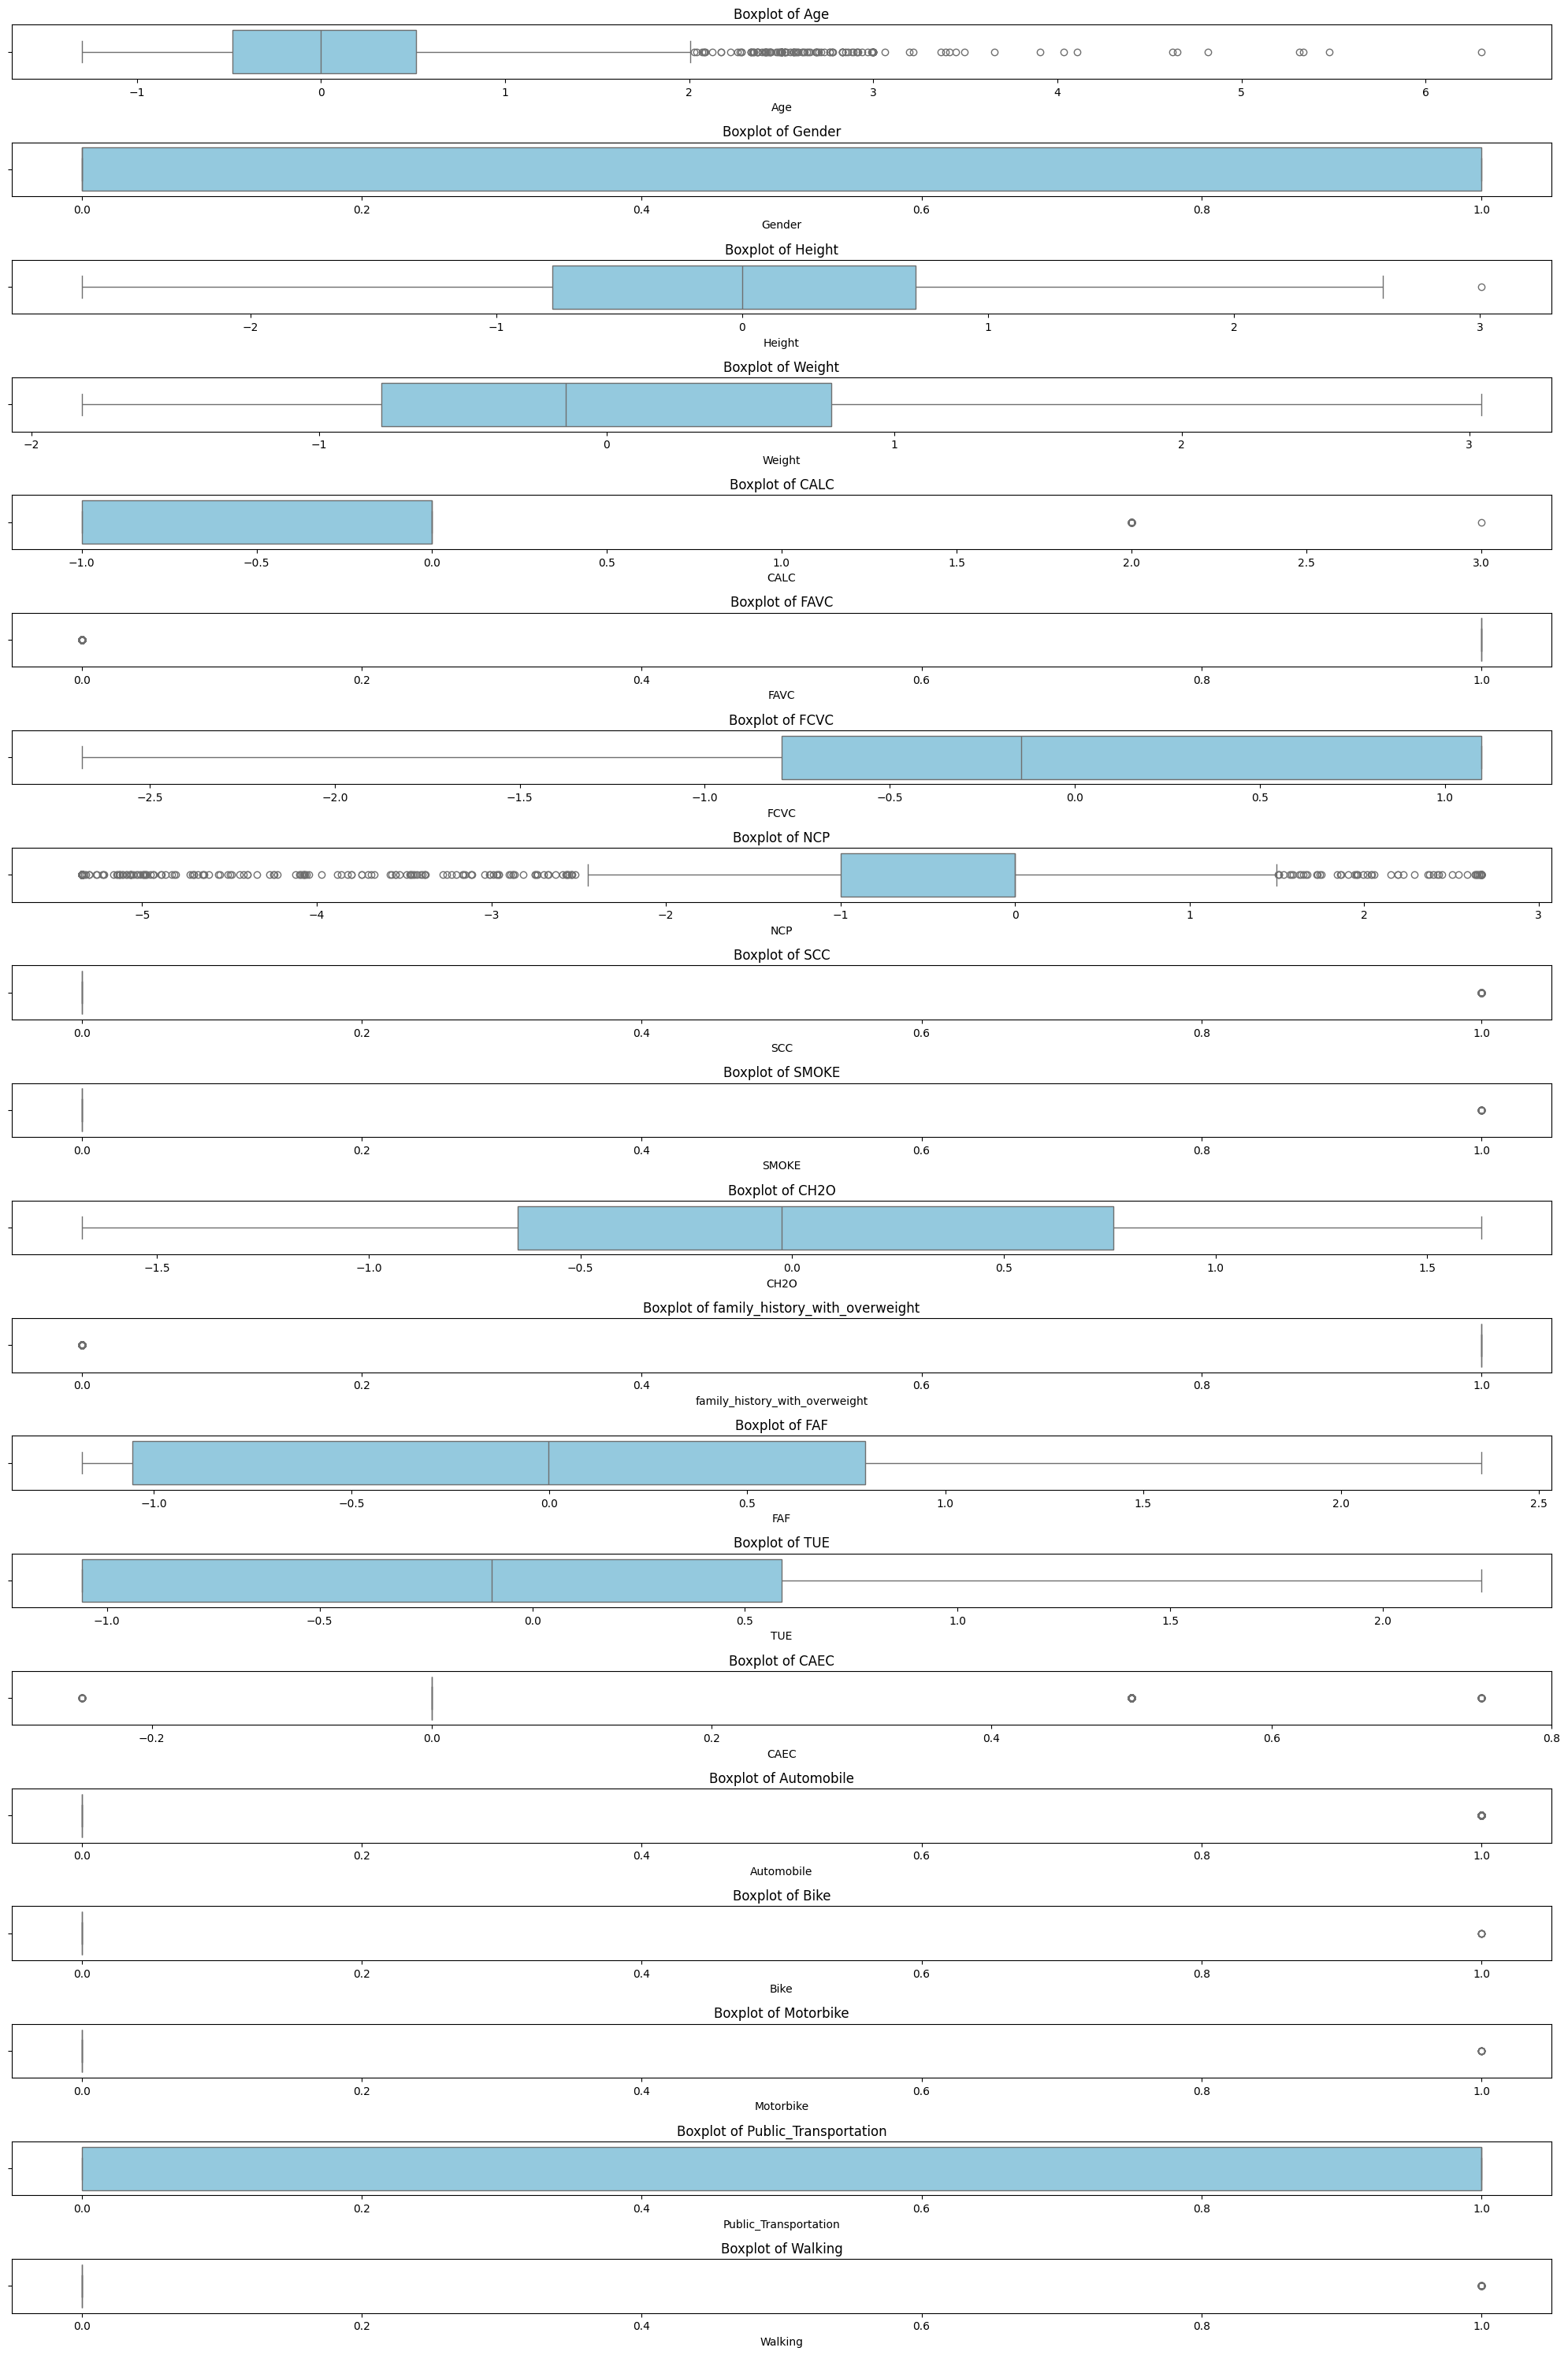

In [ ]:
numeric_cols = X_train_scaled.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize = (20, 30))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x = X_train_scaled[col], color = 'skyblue')
    plt.title(f'Boxplot of {col}', fontsize = 12)
    plt.tight_layout()

plt.show()


In [ ]:
X_train_scaled = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_train_scaled.csv")
X_test_scaled = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_test_scaled.csv")

# **Classical Models**


In [ ]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
knn, y_pred, accuracy = knn_predict()
print(f"Accuracy of the model for the value of K mentioned above: {(accuracy * 100):.2f}%")

Best value of K is 1
Accuracy of the model for the value of K mentioned above: 86.12%


In [ ]:
log, y_pred, accuracy = log_predict()
print(f"Logistic Regression prediction accuracy: {(accuracy * 100):.2f}")

Logistic Regression prediction accuracy: 88.01


In [ ]:
nb, y_pred, accuracy = nb_predict()
print(f"Naive Bayes Prediction accuracy {(accuracy * 100):.2f}%")

Naive Bayes Prediction accuracy 54.42%


In [ ]:
dt, y_pred, accuracy = dt_predict()
print(f"Decision Tree prediction accuracy: {(accuracy * 100):.2f}")

Decision Tree prediction accuracy: 94.01


# **Neural Network**

# **Kmeans Clustering**

In [ ]:
#Treating the target as a feature as well
df = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/scaled_processed_dataset.csv")

In [ ]:
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_) # Append the squared distance of each cluster to their centroid

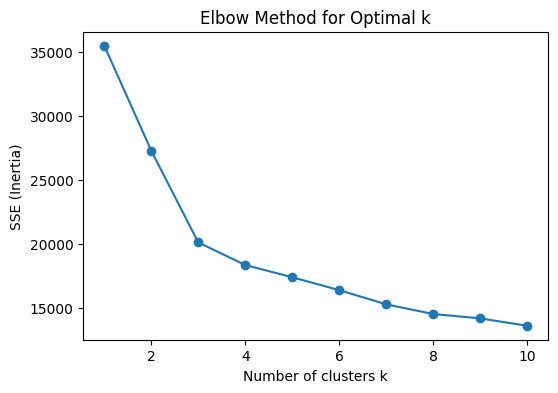

In [ ]:
# Finding elbow
plt.figure(figsize = (6 , 4))
plt.plot(K_range, sse, marker = 'o')
plt.xlabel("Number of clusters k")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
boss_k = 3
kmeans = KMeans(n_clusters = boss_k, random_state=42)
labels = kmeans.fit_predict(df)

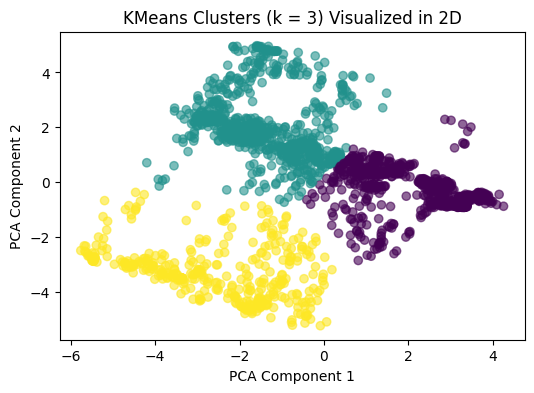

In [ ]:
df['cluster'] = labels
pca = PCA(n_components = 2) #Fit all the features into n_components number of axes
X_pca = pca.fit_transform(df)
plt.figure(figsize=(6,4))
plt.scatter(X_pca[: , 0], X_pca[: , 1], c = labels, cmap = 'viridis', alpha = 0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"KMeans Clusters (k = {boss_k}) Visualized in 2D")
plt.show()